# **Climate Change Belief Analysis**
-----------------

#### by Team_ZM4

<br>
<img src="https://scx2.b-cdn.net/gfx/news/hires/2019/7-climatechange.jpg" />
<br>

# **Contents**
-----------------
1. Imports
  - Comets
  - Packages
  

2. Import Data
  - Importing train and test datasets
  
3. Explonatory Data Analysis
  - Missing values and blank strings
  - Data summary statisitics
  - Sentiment Visual Distributions

4. Data Preprocessing
  - Letter casing
  - Noise removal
  - Stopword removal
  - Normalization
  - Stemming
  
5. Model Building
  - Training models with inbalanced data
  - Training models with balanced data
  
6. Predict Deployment

7. Submission

8. Conclusion
  

## Introduction


### About Company


Dream World company deals in producing products and services that are environmentally friendly and sustainable. They have presence across all urban, semi urban and rural areas. 


### Problem Statement

The Company is looking to create products and services that is environmentally friendly. They would like to understand their consumers' view on climate change. To address this, we are going to create Machine Learning models that are able to classify whether or not a person believes in climate change, based on their novel tweet data. Correct classification of a tweet will help company understand consumer sentiment, which will further guide their business strategies.

### Data


Variable Descriptions

- sentiment: Sentiment of tweet (pro, anti, neutral,news).

- message: Tweet body (raw tweet).

- tweetid: Twitter unique id (unique integer).

Target Variable (sentiment)

- 1 : Pro --> the tweet supports the belief of a man-made climate change.
- 2 : News --> the tweet links to factual news about climate change.
- 0 : Neutral --> the tweet neither supports nor refutes the belief of a man-made climate change.
- -1 : Anti --> the tweet does not believe in a man made climate change

-----------------

# 1. **Imports**
------------------

### Import Comet

Comet is a great tool for model versioning and experimentation as it records the parameters and conditions from each of the experiements- allowing for reproducing of results, or going back to a previous version of the experiment.



In [1]:
# pip install comet_ml

In [2]:
# import comet
from comet_ml import Experiment

In [3]:
# Create an experiment with the comet generated api key:
exp = Experiment(log_code = True, api_key="mShbgzhxnrYUzWrn9RhywdWfN",
                 project_name="classification-zm4-dsft21",
                 workspace="rikuskruger",
                 )



COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/rikuskruger/classification-zm4-dsft21/a4a29526313844faab9d096ab1e7177a



### Import Packages

In [4]:
# Importing modules for data science and visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud 
from wordcloud import WordCloud, STOPWORDS
import time
mpl.rcParams['figure.dpi'] = 180
%matplotlib inline

# NLP Libraries

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
import nltk

# ML Libraries


import nltk
from sklearn.metrics import accuracy_score
from nltk.tokenize import RegexpTokenizer
from nltk import TreebankWordTokenizer, SnowballStemmer, PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import string
import urllib
import pickle

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

After importing the dependencies, both the train data and test data are read in. From train dataset and test data

---------------------------

# 2. **Importing Data**
-----------------


Train.csv: Dataset that contains all the variables that should be used to train the model

Test.csv : Dataset that contains variables that will be used to test the model

In [5]:
test = pd.read_csv('test.csv') 
train = pd.read_csv('train.csv') 

---------------------

In [6]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [7]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


# 3. **Explonatory Data Analysis**
-------------------

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. This approach for data analysis uses many tools (mainly graphical tools) to maximize insight into a data set, extract important variables and detect outliers and anomalies, amongst other details that is missed when looking at DataFrame.

#### Missing values and blank strings

In [8]:
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [9]:
test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [10]:
blanks = []  

for ms in train.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [11]:
blanks = []  

for ms in test.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


#### Observation:

- The training dataset has no null values or any blank tweet rows within it.

- The test data also has no missing values or blank tweet rows.



#### Data summary statisitics

In [12]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [14]:

test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [15]:

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


#### Observations:

- The train and test datasets contains one categorical column called 'message'
- The train dataset contains three columns
- The test data contains two columns, it excluses the predictive (y) column sentiment
- Some tweets contain twitter handles (e.g @RawStory), numbers (e.g year 2016), hashtags (e.g #TodayinMaker# WIRED) and re-tweets (RT).
- Some tweets contain names of ogarnisations, continents and countries.
- New lines are represented by '\n' in the tweet string.


## Sentiment Visual Distribution
-------------

####  The percentage of each sentiment row

The following code will count the number of rows each sentiment has and the total percentage it carries

In [16]:
categories = train['sentiment'].value_counts().to_frame()
categories.index.rename('categories',inplace=True)
categories.rename({'sentiment':'no_of_entries'},axis=1,inplace=True)
categories['percentage'] = [(f'{int(round(count/len(train),2)*100)}%') for count in categories['no_of_entries']]
categories

,no_of_entries,percentage
categories,,
1,8530,54%
2,3640,23%
0,2353,15%
-1,1296,8%


#### Percentage distribution of each category in sentiment (-1, 0, 1, 2)

We will now look at how many entries of each sentiment category there is by plotting a pie chart.

In [17]:
working_df = train.copy()
# Labeling the target
working_df['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in working_df['sentiment']]

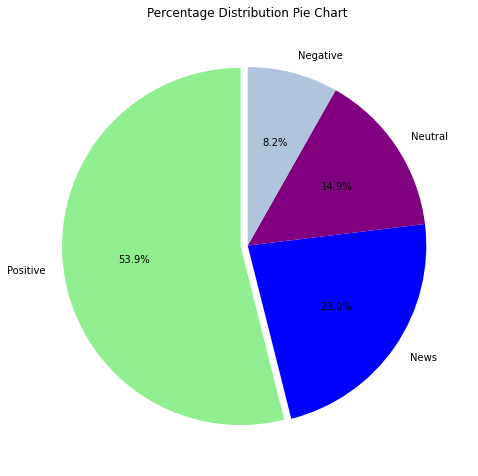

In [18]:
# checking the numerical distribution
plt.figure(figsize=(8,10))
plt.title('Percentage Distribution Pie Chart')
values = working_df['sentiment'].value_counts()/working_df.shape[0]
labels = (working_df['sentiment'].value_counts()/working_df.shape[0]).index
colors = ['lightgreen', 'blue', 'purple', 'lightsteelblue']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0, 0, 0), colors=colors)
plt.show()

#### Observations:

- The Pie-Chart Above shows that more than 50% of the tweet sample has positive sentiments about Climate Change. 
- Tweets with negative Sentiments are the least. 
- The news are also actively engaged on Climate Change as well, as we can see that they are the second popular.

####  Distribution plots for message length in each sentiment category

Text(0, 0.5, 'Density')

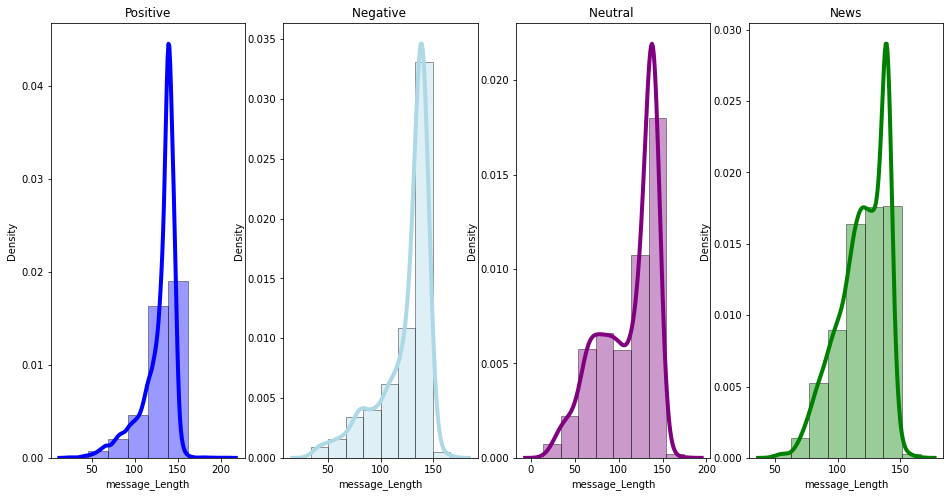

In [19]:
# initializing figure and subplots 
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))

#plot Positive 
sns.distplot(train[train['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'blue', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Positive')
ax1.set_xlabel('message_Length')
ax1.set_ylabel('Density')

#plot Negative 
sns.distplot(train[train['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'lightblue', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Negative ')
ax2.set_xlabel('message_Length')
ax2.set_ylabel('Density')

#plot Neutral 
sns.distplot(train[train['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'purple',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('message_Length')
ax3.set_ylabel('Density')

#plot Neews
sns.distplot(train[train['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'green', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('message_Length')
ax4.set_ylabel('Density')

#### Observations:

- The average length of messages for all sentiments is only limited to 140 characters. 
- It can be seen that the positive and negative sentiments has a high density contrast.

#### Visualizing average text length for each sentiment

- The code below will visualise the average text lengths for each sentiment

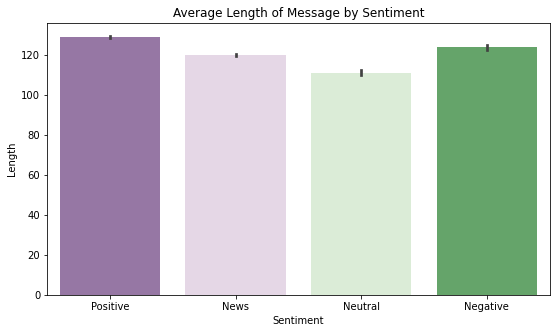

In [20]:

plt.figure(figsize=(9,5))
sns.barplot(x='sentiment', y=working_df['message'].apply(len) ,data = working_df, palette='PRGn')
plt.ylabel('Length')
plt.xlabel('Sentiment')
plt.title('Average Length of Message by Sentiment')
plt.show()

#### Observations:

- Here we see that both negative postive tweets have roughly the highest average length of tweets, with Positive having a slightly higher average



Now we will Check whether a tagged user has any relation to the sentiment, and which users are most popular in each sentiment

In [21]:
# Extracting Users in a column
working_df['users'] = [''.join(re.findall(r'@\w{,}', line)) 
                       if '@' in line else np.nan for line in working_df.message]

In [22]:
# Generating Counts of users
counts = working_df[['message', 'users']].groupby('users', as_index=False).count().sort_values(by='message', ascending=False)

In [23]:
# Top 5 most popular
counts.head()

,users,message
3410,@StephenSchlegel,307
3270,@SenSanders,243
6182,@realDonaldTrump,143
448,@BernieSanders,121
612,@CNN,106


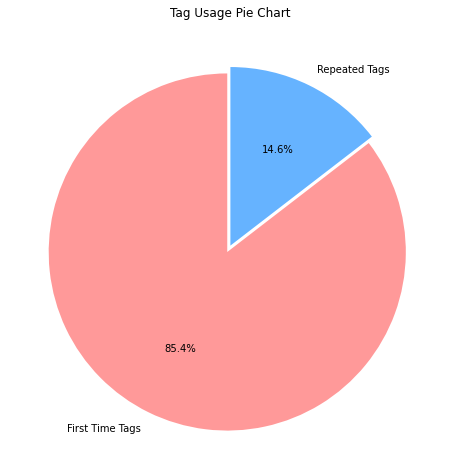

In [24]:
# checking the numerical distribution
plt.figure(figsize=(8,10))
plt.title("Tag Usage Pie Chart")
values = [sum(np.array(counts['message']) == 1)/len(counts['message']), sum(np.array(counts['message']) != 1)/len(counts['message'])]
labels = ['First Time Tags', 'Repeated Tags']
colors = ['#ff9999','#66b3ff']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0), colors=colors)
plt.show()

#### Observations:

- 14.6% of the tweets are certain users tagged more than once
- 85.4% of the tweets are certain users tagged only once

#### Analysis of most popular tags, sorted by populariy

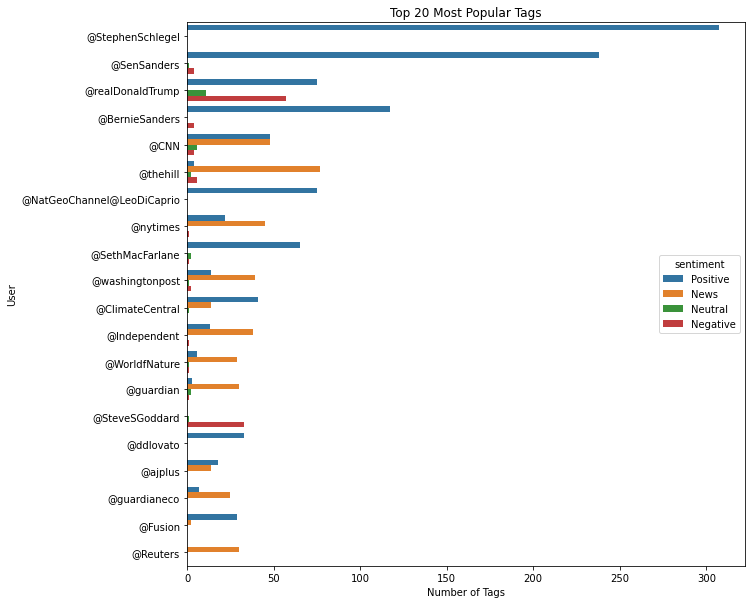

In [25]:

plt.figure(figsize=(10,10))
sns.countplot(y="users", hue="sentiment", data=working_df,
              order=working_df.users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Most Popular Tags')
plt.show()
#plt.xticks(rotation=90)

#### Observations:

- We can see from the graph that most tags are from Postive, Negative and News sentiments.  
- We can also see from the graph that @StephenSchlegel have the most positive tweets tags and the the former President of America, @realDonaldTrump has the most negative tweets tags.

Now, that we know that most of the tags comes from the Postive, Negative and News sentiments. Lets now analyse the tags and their users separately 

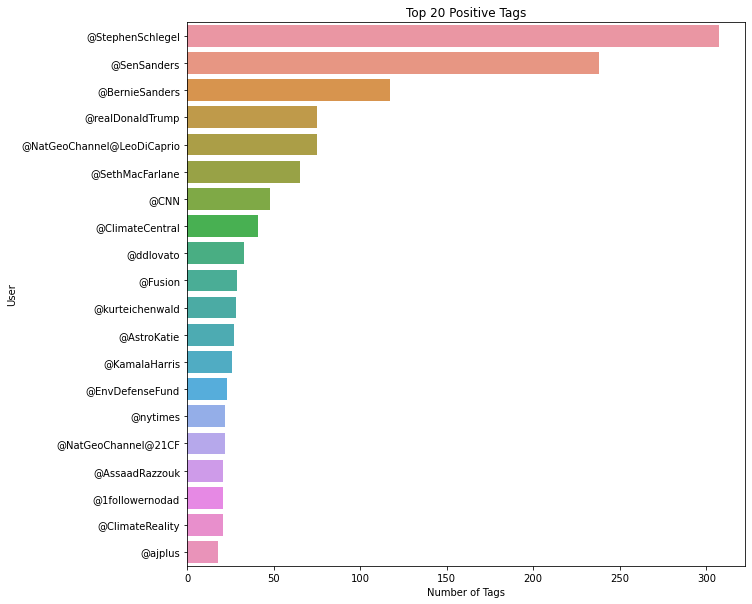

In [26]:
# Analysis of most popular tags, sorted by populariy
plt.figure(figsize=(10,10))
sns.countplot(data=working_df[working_df['sentiment'] == 'Positive'], y="users",
              order=working_df[working_df['sentiment'] == 'Positive'].users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Positive Tags')
# plt.xticks(rotation=85)
plt.show()
plt.savefig('Top 20 Positive Tags.png', dpi=300, bbox_inches='tight')

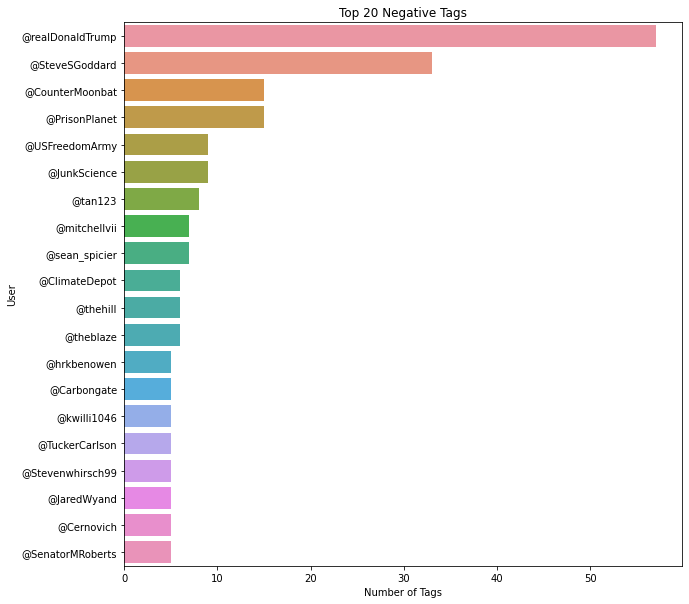

In [27]:
# Analysis of most popular tags, sorted by populariy
plt.figure(figsize=(10,10))
sns.countplot(data=working_df[working_df['sentiment'] == 'Negative'], y="users",
              order=working_df[working_df['sentiment'] == 'Negative'].users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Negative Tags')
# plt.xticks(rotation=85)
plt.show()
plt.savefig('Top 20 Negative Tags.png', dpi=300, bbox_inches='tight')

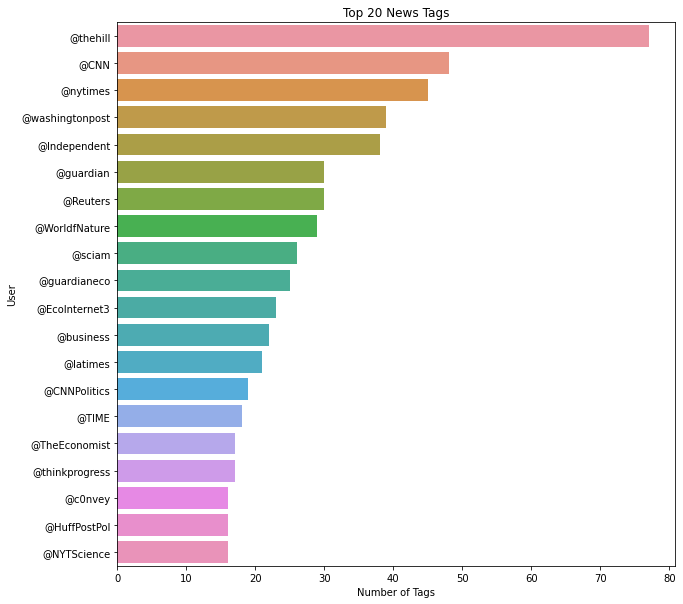

In [28]:

# Analysis of most popular tags, sorted by populariy
plt.figure(figsize=(10,10))
sns.countplot(data=working_df[working_df['sentiment'] == 'News'], y="users",
              order=working_df[working_df['sentiment'] == 'News'].users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 News Tags')
# plt.xticks(rotation=85)
plt.show()
plt.savefig('Top 20 News Tags.png', dpi=300, bbox_inches='tight')

#### Observations:

- The count of negative sentiments by a single tag is much less that that of the positive sentiments.
- On the positive sentiments, the threshhold count, was above 300, while on the negative, it is less than 60. However, we can see that the most popular tag associated with negative tweets at this time, was the former President of the U.S.A.

# 4. Data Preprocessing
-------------


Cleaning is the process of detecting and correcting corrupt or inaccurate records from the dataset and identifying incomplete, incorrect, inaccurate or irrelevant parts of the data.

The following methods will be used to clean and process our data

- Letter casing: Converting all letters to either upper case or lower case. 
- Tokenizing: Eliminating unwanted characters, such as HTML tags, punctuation marks, special characters, white spaces etc.
- Noise removal: Some words do not contribute much to the machine learning model, so it's good to remove them. A list of stopwords can be defined by the nltk library, or it can be business-specific.
- Stopword removal: Normalization generally refers to a series of related tasks meant to put all text on the same level. Converting text to lower case, removing special characters, and removing stopwords will remove basic inconsistencies.
- Normalization: Normalization improves text matching.
- Stemming: Eliminating affixes (circumfixes, suffixes, prefixes, infixes) from a word in order to obtain a word stem. Porter Stemmer is the most widely used technique because it is very fast. Generally, stemming chops off end of the word, and mostly it works fine.

Lets have a look at what a typical tweet looks like to get an idea of what we can expect to see from the other tweets:

#### Sample tweet

In [29]:
tweet = train.iloc[6,1]
print(tweet)

RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R



Looking at the tweet above, we see that it contains the following:

- Punctuation
- Capital letters
- Special characters
- web link/url

We can expect to find the listed items in all the tweets and we need to remove these to clean our tweets.

We start cleaning our data by removing urls we expect to find in our tweets:

In [30]:
## Remove urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train['message'] = train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

## Remove urls test
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
test['message'] = test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

Capital letters are classified different from lower case letters and because of this we will convert all the tweets to lower case.

In [31]:
# Make lower case
train['message'] = train['message'].str.lower()

# Make lower case
test['message'] = test['message'].str.lower()

We will also remove all punctuation and numbers.

In [32]:
#Noise removal:
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])

    
train['message'] = train['message'].apply(remove_punctuation_numbers)
test['message'] = test['message'].apply(remove_punctuation_numbers)

In natural language processing, useless words (data) such as (the, a, an, in), are referred to as stop words. We will be removing the stop words from all the tweets.

In [33]:
#Stopword removal:
vect = CountVectorizer(stop_words='english', min_df= .01)
X = vect.fit_transform(train['message'])

vect = CountVectorizer(stop_words='english', min_df= .01)
X = vect.fit_transform(test['message'])

To make sure our tweets are completely clean we will also remove all NonAscii characters from the tweets

In [34]:
#Remove NonAscii
def _removeNonAscii(s): 
    
    return "".join(i for i in s if ord(i)<128)


train['message'] = train['message'].apply(_removeNonAscii)
test['message'] = test['message'].apply(_removeNonAscii)

Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. We will now convert all the words in each tweet to their respective stem

In [35]:
#Eliminating affixes (circumfixes, suffixes, prefixes, infixes) from a word in order to obtain a word stem
ps = PorterStemmer()
stemmed_words = [ps.stem(w) for w in train['message']]
stemmed_words = [ps.stem(w) for w in test['message']]

#lemmatizer = WordNetLemmatizer()
#lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in train['message']]
#lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in test['message']]

In [36]:
pd.set_option('display.max_colwidth', -1)
train.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via mashable,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,rt rawstory researchers say we have three years to act on climate change before its too late urlweb urlweb,698562
3,1,todayinmaker wired was a pivotal year in the war on climate change urlweb,573736
4,1,rt soynoviodetodas its and a racist sexist climate change denying bigot is leading in the polls electionnight,466954


Now, our data is clean, we can building our model

# 5. Model Building
-------------


#### Below is the list of the Models that will be trained:


- Logistic Regression
- Support Vector Classification (SVC)
- Linear SVC
- Random Forest Classifier
- MultinominalNB


## Training Models

#### Train Test Split

Split the train_data into training and testing data. This is to make sure that there isn't any leakage of information when we actually fit the test_data that we imported. To avoid overfitting, we are using the train_data to train and test our models.

In [37]:
#Splitting you Data for X and Y
X_NT = train['message']
y = train['sentiment']

#### Vectorization

Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text. In this guide, we'll implement vectorization using tf-idf. There are other techniques as well, such as Bag of Words and N-grams.

In [38]:
#vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
vector.fit(X_NT)
X = vector.transform(X_NT)

# save the model to disk
filename = 'TfidfVectorizer.pkl'
pickle.dump(vector, open(filename, 'wb'))

#### Train-test split:

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Model training and Predictions

#### Random Forest Classifier

Random forest models are an example of an ensemble method that is built on decision trees (i.e. it relies on aggregating the results of an ensemble of decision trees). Decision tree machine learning models represent data by partitioning it into different sections based on questions asked of independent variables in the data. Training data is placed at the root node and is then partitioned into smaller subsets which form the 'branches' of the tree. In random forest models, the trees are randomized and the model returns the mean prediction of all the individual trees

In [40]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=500)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rf_accuracy = accuracy_score(y_test,rfc_pred)
rf_f1 = round(f1_score(y_test, rfc_pred, average='weighted'),4)
print('accuracy_score',accuracy_score(y_test, rfc_pred))
report = classification_report(y_test, rfc_pred, output_dict=True)
pd.DataFrame(report).transpose()

accuracy_score 0.6969026548672567


,precision,recall,f1-score,support
-1,0.972973,0.138996,0.243243,259.000000
0,0.662857,0.246285,0.359133,471.000000
1,0.668515,0.918523,0.773827,1706.000000
2,0.799342,0.667582,0.727545,728.000000
accuracy,0.696903,0.696903,0.696903,0.696903
macro avg,0.775922,0.492846,0.525937,3164.000000
weighted avg,0.722697,0.696903,0.658013,3164.000000


In [41]:
rfc_param_grid = {'n_estimators' : [100, 250, 500, 1000],
                  'max_depth' : [100, 250, 500, 1000]

}

# Commented out for testing purposes

# rfc_grid = GridSearchCV(rfc,
#                     param_grid=rfc_param_grid,                                 
#                     cv=10,
#                     n_jobs= 1)

# rfc_grid.fit(X_train, y_train)

# best_rfc = rfc_grid.best_estimator_

# print(f'Best params: {rfc_grid.best_params_}')

# rfc_grid_pred = best_rfc.predict(X_test)
# rfc_grid_accuracy = accuracy_score(y_test,rfc_grid_pred)
# rfc_grid_f1 = round(f1_score(y_test, rfc_grid_pred, average='weighted'),4)
# print('accuracy_score',accuracy_score(y_test, rfc_grid_pred))
# report = classification_report(y_test, rfc_grid_pred, output_dict=True)
# pd.DataFrame(report).transpose()

In [42]:
# save the model to disk
filename = 'rfc_model.pkl'
pickle.dump(rfc, open(filename, 'wb'))

In [43]:
rf_params={"n_estimators": 1000,
        "model_type": "Random Forest Classifier",
        "param_grid": str(rfc_param_grid),
        "stratify": True
}

metrics = {"rf_f1": rf_f1,
           "rf_accuracy": rf_accuracy
}

exp.log_dataset_hash(X_train)
exp.log_parameters(rf_params)
exp.log_metrics(metrics)

#### LinearSVC

The objective of a Linear Support Vector Classifier is to return a "best fit" hyperplane that categorises the data. It is similar to SVC with the kernel parameter set to ’linear’, but it is implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and can scale better to large numbers of samples.

In [44]:
lsvc = LinearSVC(C=0.8, verbose=0)
lsvc.fit(X_train,  y_train)
lsvc_pred = lsvc.predict(X_test)
lsvc_accuracy = accuracy_score(y_test,lsvc_pred)
lsvc_f1 = round(f1_score(y_test, lsvc_pred, average='weighted'),4)
print('', lsvc_accuracy)
report = classification_report(y_test, lsvc_pred, output_dict=True)
pd.DataFrame(report).transpose()

# save the model to disk
filename = 'lsvc_model.pkl'
pickle.dump(lsvc, open(filename, 'wb'))

 0.7443109987357776


In [45]:
metrics = {"lsvc_f1": lsvc_f1,
           "lsvc_accuracy": lsvc_accuracy
}

lsvc_params={'model_type': 'Linear SVC',
             'C': 0.8,
             'verbose': 0,
             'stratify': True
}

exp.log_parameters(lsvc_params)
exp.log_metrics(metrics)

#### Support Vector Classifier

A Support Vector Classifier is a discriminative classifier formally defined by a separating hyperplane. When labelled training data is passed to the model, also known as supervised learning, the algorithm outputs an optimal hyperplane which categorizes new data

In [46]:
svc = SVC(gamma = 0.8, C = 10, random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,y_pred_svc)
svc_f1 = round(f1_score(y_test, y_pred_svc, average='weighted'),4)
pd.DataFrame(report).transpose()

# save the model to disk
filename = 'svc_model.pkl'
pickle.dump(svc, open(filename, 'wb'))

In [47]:
metrics = {"svc_f1": svc_f1,
           "svc_accuracy": svc_accuracy
}

svc_params={'model_type': 'SVC',
             'C': 10,
             'gamma': 0.8,
             'random_state': 42
}

exp.log_parameters(svc_params)
exp.log_metrics(metrics)

#### Logistic Regression Model

Logistic regression is a statistical model that makes use of a logistic function to model a binary dependent variable, however, multiclass classification with logistic regression can be done through the one-vs-rest scheme in which a separate model is trained for each class to predict whether an observation is that class or not (thus making it a binary classification problem)

In [48]:
#logist = LogisticRegression()
lr_model = LogisticRegression(C=10)
lr_model.fit(X_train, y_train)
y_predict_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test,y_predict_lr)
lr_f1 = round(f1_score(y_test, y_predict_lr, average='weighted'),4)
report = classification_report(y_test, y_predict_lr, output_dict=True)
pd.DataFrame(report).transpose()

# save the model to disk
filename = 'lr_model.pkl'
pickle.dump(lr_model, open(filename, 'wb'))

In [49]:
metrics = {"lr_f1": lr_f1,
           "lr_accuracy": lr_accuracy
}


lr_params={'model_type': 'Logistic Regression',
             'C': 10
}

exp.log_parameters(lr_params)
exp.log_metrics(metrics)

#### MultinomialNB model

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [62]:
mnb_model = MultinomialNB(alpha=0.1)

MultinomialNB_param_grid = {
                            'alpha': [0.01, 0.1, 1]
                           }

# grid = GridSearchCV(MNB_model,
#                     param_grid=MultinomialNB_param_grid,                                 
#                     cv=10,
#                     n_jobs= -1))])


mnb_model.fit(X_train, y_train)
y_predict_mnb = mnb_model.predict(X_test)
mnb_accuracy = accuracy_score(y_test,y_predict_mnb)
mnb_f1 = round(f1_score(y_test, y_predict_mnb, average='weighted'),4)
report = classification_report(y_test, y_predict_mnb, output_dict=True)
pd.DataFrame(report).transpose()

# save the model to disk
filename = 'mnb_model.pkl'
pickle.dump(svc, open(filename, 'wb'))
print(mnb_f1)

0.7042


In [51]:
metrics = {"mnb_f1": mnb_f1,
           "mnb_accuracy": mnb_accuracy
}

mnb_params={'model_type': 'MultinomialNB',
             'alpha': 0.1
}

exp.log_parameters(mnb_params)
exp.log_metrics(metrics)
exp.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/rikuskruger/classification-zm4-dsft21/a4a29526313844faab9d096ab1e7177a
COMET INFO:   Metrics:
COMET INFO:     lr_accuracy   : 0.7427307206068268
COMET INFO:     lr_f1         : 0.731
COMET INFO:     lsvc_accuracy : 0.7443109987357776
COMET INFO:     lsvc_f1       : 0.7307
COMET INFO:     mnb_accuracy  : 0.722819216182048
COMET INFO:     mnb_f1        : 0.7042
COMET INFO:     rf_accuracy   : 0.6969026548672567
COMET INFO:     rf_f1         : 0.658
COMET INFO:     svc_accuracy  : 0.7493678887484198
COMET INFO:     svc_f1        : 0.7308
COMET INFO:   Parameters:
COMET INFO:     C                        : 10
COMET INFO:     alpha                    : 0.1
COMET INFO:     analyzer                 : word
COMET INFO:     binary                   : 1
COME

#### Models Comparative Analysis

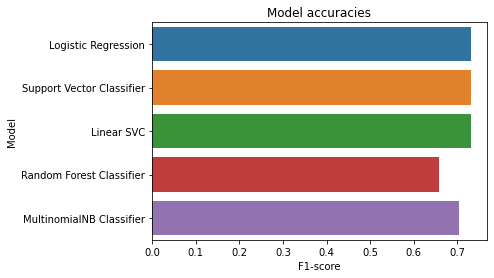

<Figure size 432x288 with 0 Axes>

In [117]:
f1_dict = {f'Logistic Regression': lr_f1,
          f'Support Vector Classifier': svc_f1, 
          f'Linear SVC': lsvc_f1, 
          f'Random Forest Classifier': rf_f1,
          f'MultinomialNB Classifier' : mnb_f1
         }

i = pd.DataFrame(f1_dict.items(), columns=['Model', 'f1'])
# print(list(f1_dict.values()))
sns.barplot(x=list(f1_dict.values()*100), y=list(f1_dict.keys())) 
plt.ylabel('Model')
plt.xlabel('F1-score')
plt.title('Model accuracies')
# plt.xticks(rotation=85)
plt.show()
plt.savefig('Model accuracies.jpg')

From the performance metrics, we see that the Logistic Regression model performed the best on our training, closely followed by the Linear SVC and Support Vector Classifier.

As we saw that  Logistic Regression model performed the best on our training, (gave an F1 score of 0.7605), we will use it to do our predictions.

# 6. Model Deployment
-------------------------------

#### Preprocessing: Predicting on the test set
Preprocessing The first thing we need to do is to get our data in the correct format. We will use the same techniques we used when preparing the training data to ensure we do not get any errors.

In [53]:
tweet_id = test['tweetid']
X_test_ = vector.transform(test['message'].values)

In [54]:
X_test_.shape

(10546, 23710)

#### Making predictions

In [55]:
preds = lr_model.predict(X_test_)

In [56]:
preds

array([1, 1, 1, ..., 2, 0, 1], dtype=int64)

In [57]:
test['sentiment'] = preds

In [58]:
test.head()

,message,tweetid,sentiment
0,europe will now be looking to china to make sure that it is not alone in fighting climate change urlweb,169760,1
1,combine this with the polling of staffers re climate change and womens rights and you have a fascist state urlweb,35326,1
2,the scary unimpeachable evidence that climate change is already here urlweb itstimetochange climatechange zeroco,224985,1
3,karoli morgfair osborneink dailykos \nputin got to you too jill \ntrump doesnt believe in climate change at all \nthinks its s hoax,476263,1
4,rt fakewillmoore female orgasms cause global warming\nsarcastic republican,872928,0


# 8 Submission

#### Kaggle Submission

In [59]:
# create submission dataframe
submission = pd.DataFrame(
    {'tweetid': tweet_id,
     'sentiment': preds
    })

In [60]:
# save DataFrame to csv file for submission
submission.to_csv("Classification_ZM4.csv", index=False)

# 7. Conclusion
-------------------

In this notebook we explored data which entailed tweets related to climate change and their belief on whether the user/tweet is pro, neutral or anti the belief. The data had a sentiment category of News as well, this were tweets that entailed relevant information regarding the topic at hand.

We started off by exploring the data, preprocessing our data using different methods such as Letter casing, Noise removal, Stopword removal, Normalization and Stemming, Training models.

Our top for models in this notebook are the LinearSVC, SVC, Random forest and logidtic regression that we have trained. The performance metric that we were more interested in was the weighted average f1 score. This is mainly because the f1 score is a measure of accuracy which considers both the precision and recall scores.


We have thus built predictive models which Dream World company can use to better understand their customer's take on climate change. Such a model can prove important in guiding business in terms of the strategies to be adopted in production, marketing etc.